## Instruksi
1. Copy colab file ke drive masing-masing
1. Rename file colab dengan format : NAMA_LENGKAP_DATASET.ipynb
1. Lengkapi bagian kode
1. Berikan dokumentasi pada setiap cell kode
---

### Import Seluruh Kebutuhan Library

In [0]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 


### Load Dataset dan Tampilkan Isi Data
* load data dapat dilakukan melalui unggah file lokal maupun unduh data dari url ([contoh](https://colab.research.google.com/drive/1YP6BQpJKotuR61vPdv4-Ap-oFdqhDuJj))
* print standar, maupun menggunakan pandas

In [0]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv

--2019-07-29 03:32:24--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.05s   

2019-07-29 03:32:24 (6.76 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



In [0]:
df = pd.read_csv("kc_house_data.csv")

# take a look at the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


### Praproses Data
* cek jika terdapat record / field yang tidak layak dipakai
* lakukan praproses terhadap data-data tersebut

In [0]:
# summarize the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.165000e+03,3.165000e+03,3165.000000,3165.000000,3165.000000,3.165000e+03,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3164.000000,3164.000000
mean,4.645675e+09,5.354183e+05,3.381359,2.071564,2070.030964,1.524746e+04,1.434755,0.009795,0.244234,3.459084,7.615482,1761.024329,309.006635,1967.480885,94.638863,98077.137757,47.557908,-122.212364,1982.544564,13176.302465
std,2.853857e+09,3.808415e+05,0.895398,0.768327,920.106459,4.253820e+04,0.507771,0.098498,0.776188,0.682533,1.166191,815.906643,459.089397,28.094781,424.375685,54.169012,0.140785,0.139564,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.200500e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.455000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459800,-122.324000,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1969.000000,0.000000,98059.000000,47.572600,-122.226000,1830.000000,7873.000000
75%,7.355700e+09,6.400000e+05,4.000000,2.500000,2500.000000,1.122000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680400,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


In [0]:
cdf = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']]
cdf.head(9)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1180,0,1955,0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,2170,400,1951,1991,47.7210,-122.319,1690.0,7639.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,770,0,1933,0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1050,910,1965,0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1680,0,1987,0,47.6168,-122.045,1800.0,7503.0
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,3890,1530,2001,0,47.6561,-122.005,4760.0,101930.0
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,1715,0,1995,0,47.3097,-122.327,2238.0,6819.0
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,1060,0,1963,0,47.4095,-122.315,1650.0,9711.0
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,1050,730,1960,0,47.5123,-122.337,1780.0,8113.0


### Visualisasikan Data
* Tampilkan visualisasi sederhana seperti plot, barchart, dll. [*hint*](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html)

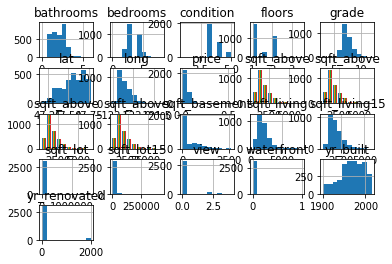

In [0]:
viz = cdf[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']]
viz.hist()
plt.show()

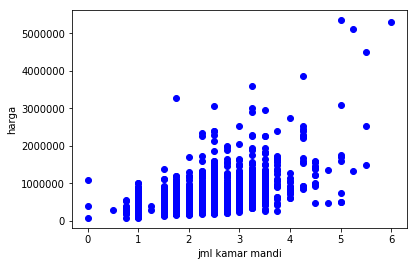

In [0]:
plt.scatter(cdf.bathrooms, cdf.price, color='blue')
plt.ylabel("harga")
plt.xlabel("jml kamar mandi")
plt.show()

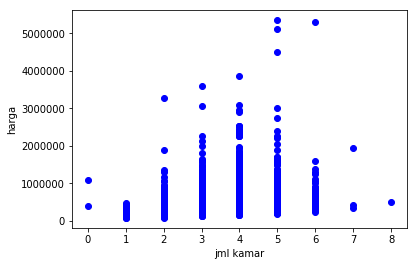

In [0]:
plt.scatter(cdf.bedrooms, cdf.price, color='blue')
plt.ylabel("harga")
plt.xlabel("jml kamar")
plt.show()

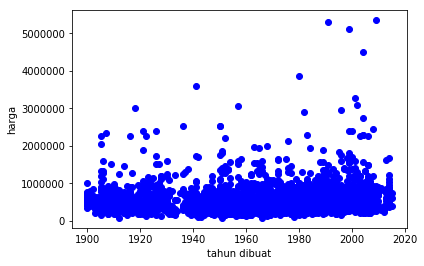

In [0]:
plt.scatter(cdf.yr_built, cdf.price, color='blue')
plt.ylabel("harga")
plt.xlabel("tahun dibuat")
plt.show()

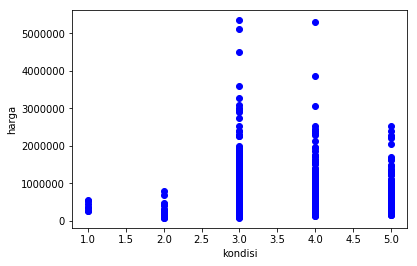

In [0]:
plt.scatter(cdf.condition, cdf.price, color='blue')
plt.ylabel("harga")
plt.xlabel("kondisi")
plt.show()

### Bagi Data
* bagi data menjadi data latih dan data uji 
* pembagian membagi variabel data dan label
* bisa menggunakan library sklearn

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Latih Model Pembelajaran Mesin,  Uji Hasil Model, Evaluasi Performa:
* Gunakan classifier yang sesuai dengan yang diperintahkan dalam [***project description***](https://drive.google.com/open?id=158T8j6uasWUfb-O9ta9l8PayIllwWcax).
* Gunakan model yang telah kalian latih untuk melakukan prediksi menggunakan data uji.
* Tampilkan evaluasi performa dari model yang dibangun menggunakan [***Confusion Matrix***](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Coefficients:  [[1.02404932e-06]]
Intercept:  [1.51852806]
Mean absolute error price & bathrooms: 0.52
Residual sum of squares (MSE): 0.40
R2-score: -1.94


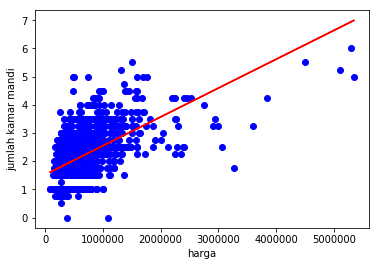

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['price']])
train_y = np.asanyarray(train[['bathrooms']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.price, train.bathrooms,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("harga")
plt.ylabel("jumlah kamar mandi")

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['price']])
test_y = np.asanyarray(test[['bathrooms']])
test_y_ = regr.predict(test_x)

print("Mean absolute error price & bathrooms: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Coefficients:  [[6.73473138e-07]]
Intercept:  [3.00256241]
Mean absolute error price & bedrooms: 0.67
Residual sum of squares (MSE): 0.74
R2-score: -11.52


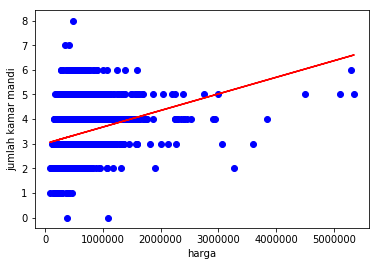

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['price']])
train_y = np.asanyarray(train[['bedrooms']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.price, train.bedrooms,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("harga")
plt.ylabel("jumlah kamar mandi")

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['price']])
test_y = np.asanyarray(test[['bedrooms']])
test_y_ = regr.predict(test_x)

print("Mean absolute error price & bedrooms: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Coefficients:  [[2.32676488e-06]]
Intercept:  [1966.14168527]
Mean absolute error price & yr_built: 22.82
Residual sum of squares (MSE): 777.61
R2-score: -1101.28


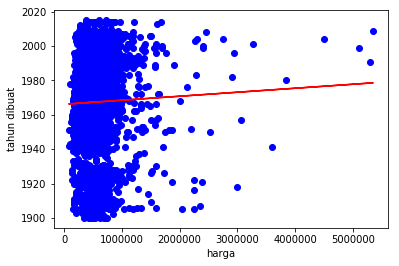

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['price']])
train_y = np.asanyarray(train[['yr_built']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.price, train.yr_built,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("harga")
plt.ylabel("tahun dibuat")

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['price']])
test_y = np.asanyarray(test[['yr_built']])
test_y_ = regr.predict(test_x)

print("Mean absolute error price & yr_built: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Coefficients:  [[1.06622427e-07]]
Intercept:  [3.38765057]
Mean absolute error price & condition: 0.61
Residual sum of squares (MSE): 0.50
R2-score: -339.84


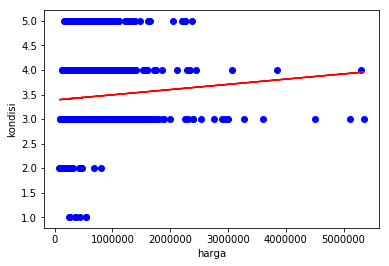

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['price']])
train_y = np.asanyarray(train[['condition']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.price, train.condition,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("harga")
plt.ylabel("kondisi")

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['price']])
test_y = np.asanyarray(test[['condition']])
test_y_ = regr.predict(test_x)

print("Mean absolute error price & condition: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

### Kesimpulannya adalah prediksi terbaik bisa diambil dari ***harga bangunan dengan jumlah kamar mandi***, karena memiliki jumlah error terkecil

* Mean absolute error price & bathrooms: 0.52
* Mean absolute error price & condition: 0.61
* Mean absolute error price & bedrooms: 0.67
* Mean absolute error price & yr_built: 22.82